# Diabetes Prediction

#### The objective of this project is to classify whether someone has diabetes or not.

Dataset consists of several Medical Variables(Independent) and one Outcome Variable(Dependent)

The independent variables in this data set are :-'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'

The outcome variable value is either 1 or 0 indicating whether a person has diabetes(1) or not(0).

#### About the Dataset
* Pregnancies :- Number of times a woman has been pregnant
* Glucose :- Plasma Glucose concentration of 2 hours in an oral glucose tolerance test
* BloodPressure :- Diastollic Blood Pressure (mm hg)
* SkinThickness :- Triceps skin fold thickness(mm)
* Insulin :- 2 hour serum insulin(mu U/ml)
* BMI :- Body Mass Index ((weight in kg/height in m)^2)
* Age :- Age(years)
* DiabetesPedigreeFunction :-scores likelihood of diabetes based on family history)
* Outcome :- 0(doesn't have diabetes) or 1 (has diabetes)


In [240]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


#### Loading the dataset

In [241]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Exploratory Data Analysis

##### Understanding the dataset

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [178]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [179]:
df.skew().sort_values(ascending=False)

Insulin                     2.272251
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Pregnancies                 0.901674
Outcome                     0.635017
Glucose                     0.173754
SkinThickness               0.109372
BMI                        -0.428982
BloodPressure              -1.843608
dtype: float64

In [180]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

##### min value of some columns is 0 which cannot be possible medically.Hence these are null values

In [181]:
import numpy as np

cols_to_fix = ['BloodPressure','Glucose','SkinThickness','Insulin','BMI']
df[cols_to_fix] = df[cols_to_fix].replace(0, np.nan)

In [182]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

##### using KNNImputer to handel the null values

In [183]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 10)  
df[cols_to_fix] = imputer.fit_transform(df[cols_to_fix])


## Data Visualization

[]

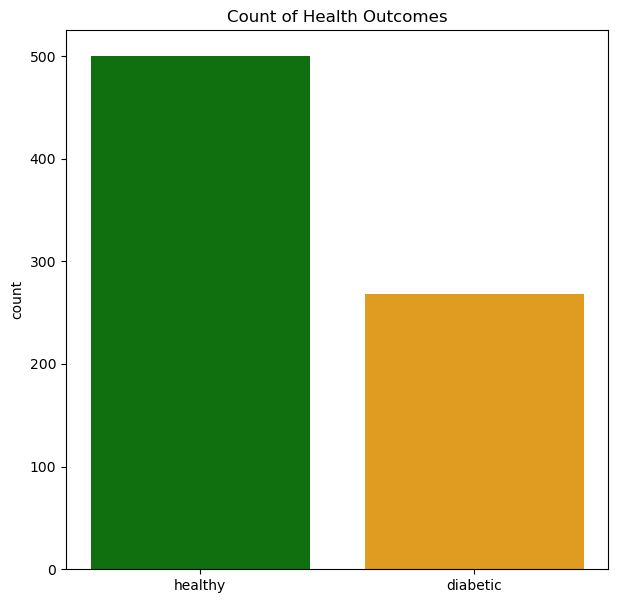

In [184]:
plt.figure(figsize=(7,7))
sns.barplot(x =['healthy','diabetic'],
            y = df['Outcome'].value_counts(),
            palette=['g','orange']
            )
plt.title('Count of Health Outcomes')
plt.plot()

[]

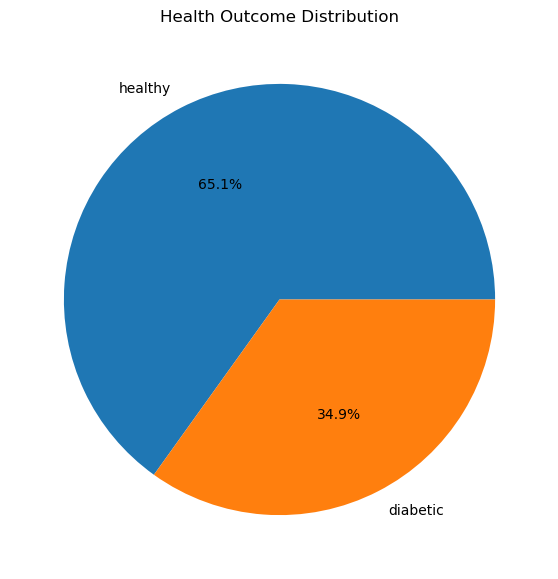

In [185]:
plt.figure(figsize=(7,7))
plt.pie(df['Outcome'].value_counts(),labels=['healthy','diabetic'],autopct='%1.1f%%')
plt.title('Health Outcome Distribution')
plt.plot()

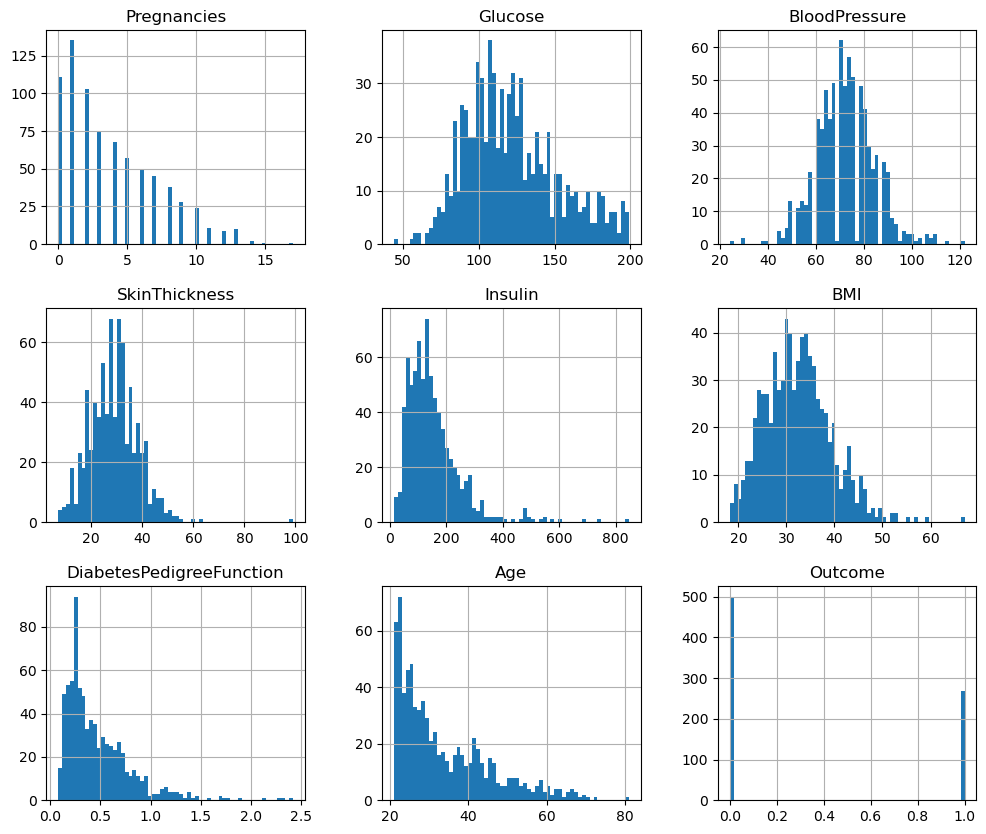

Insulin                     2.235066
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Pregnancies                 0.901674
SkinThickness               0.732905
Outcome                     0.635017
BMI                         0.597864
Glucose                     0.528870
BloodPressure               0.145377
dtype: float64

In [186]:
df.hist(bins=60, figsize=(12,10))
plt.show()
df.skew().sort_values(ascending=False)



##### Only glucose and Blood Pressure are normally distributed rest others are skewed and have outliers

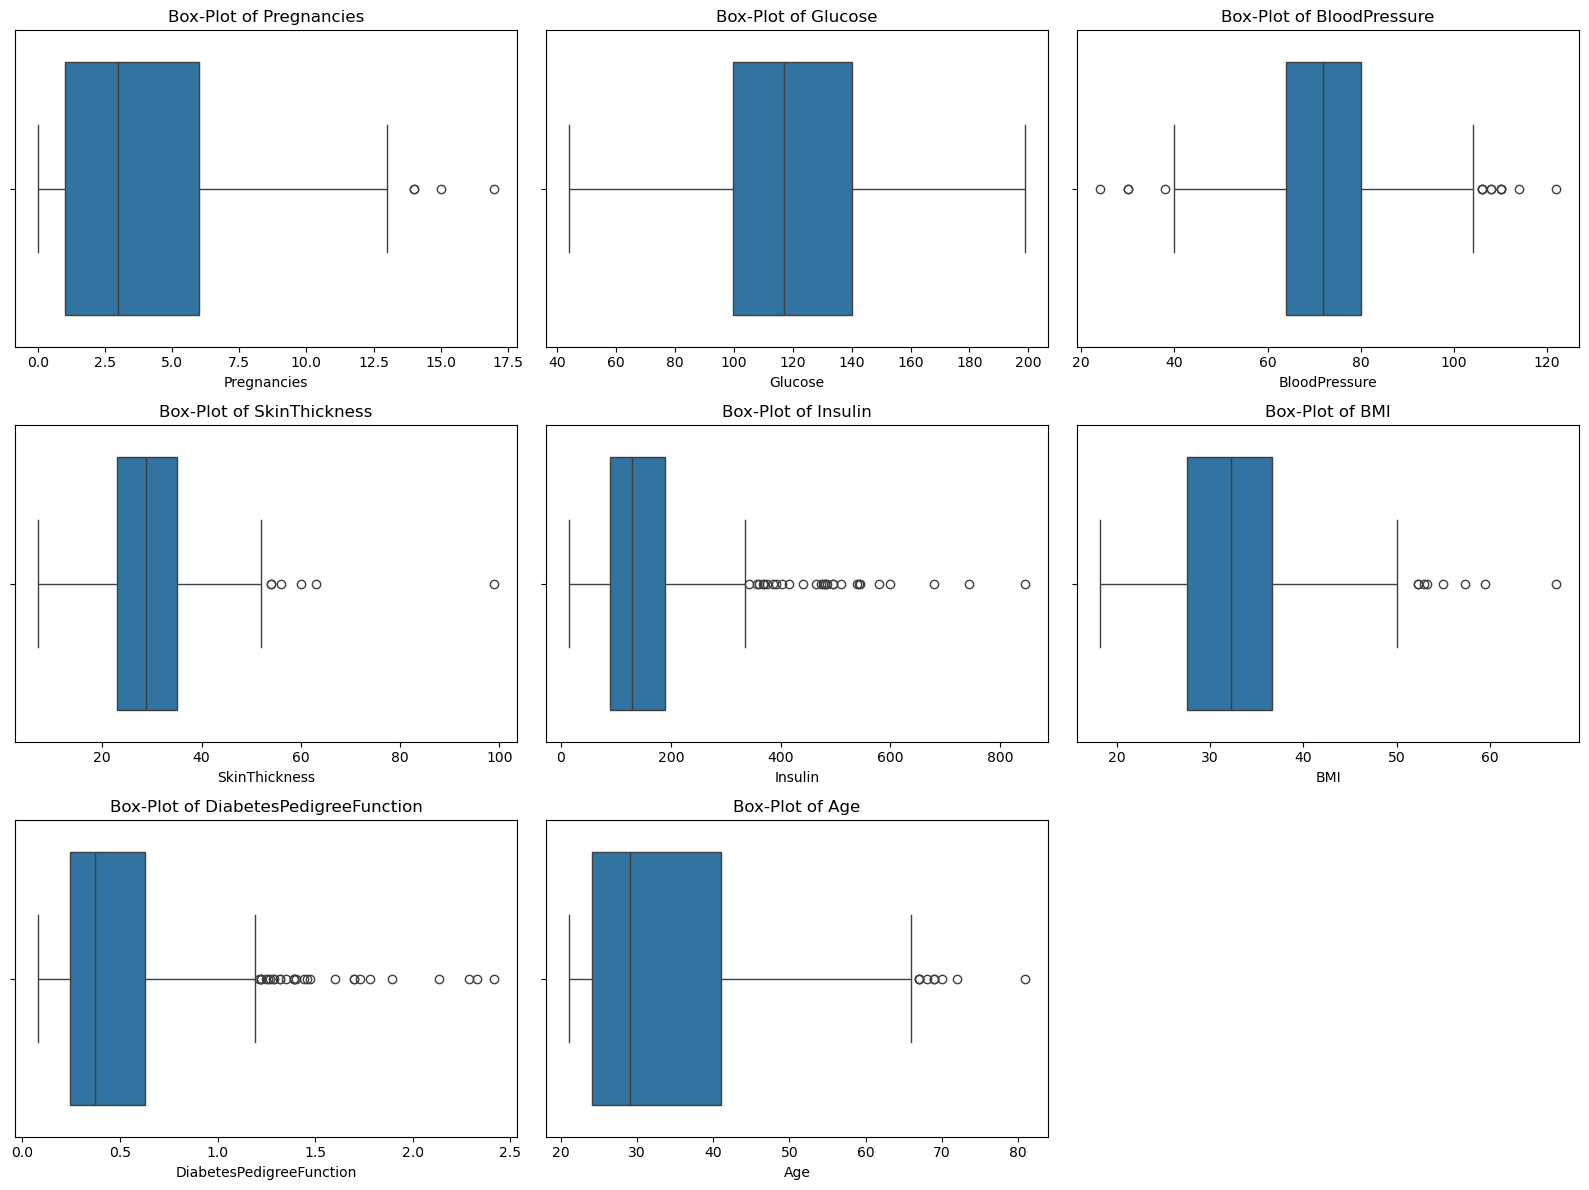

In [187]:

features = df.columns
features = features.drop('Outcome')
plt.figure(figsize=(16, 12))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=feature, data=df)
    plt.title(f'Box-Plot of {feature}', fontsize=12)

plt.tight_layout()
plt.show()


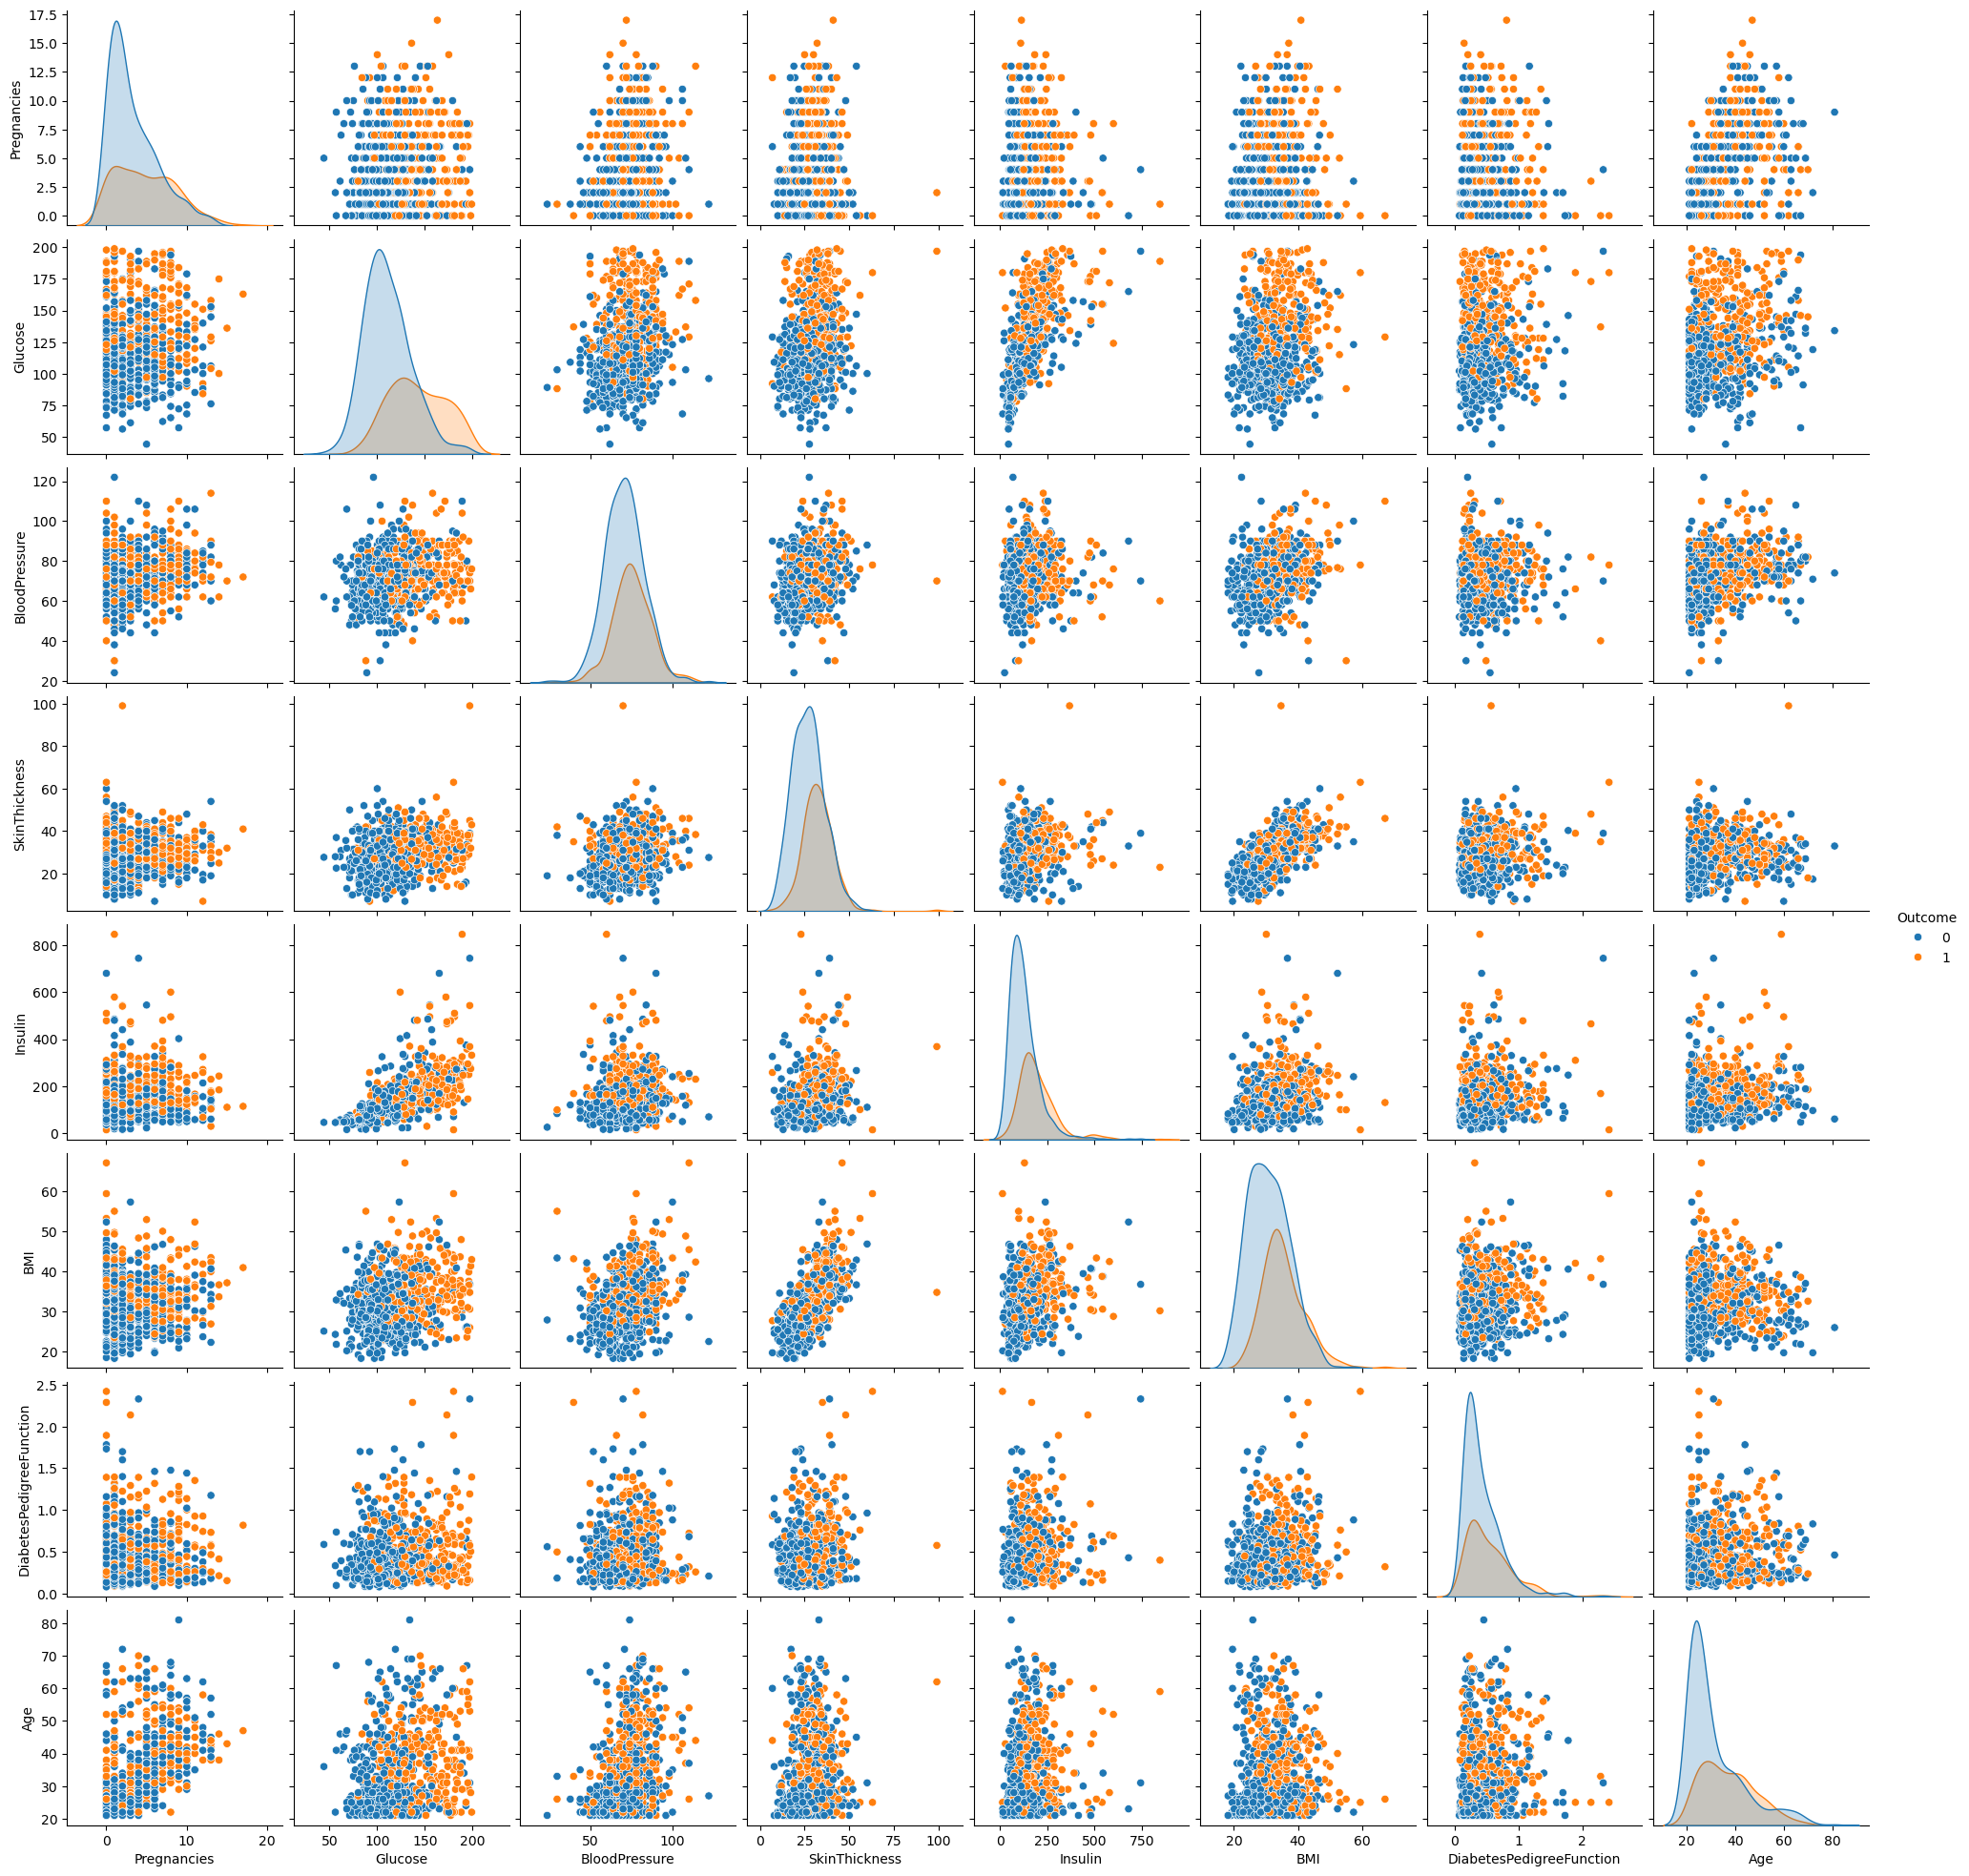

In [188]:
sns.pairplot(df,hue='Outcome')

[]

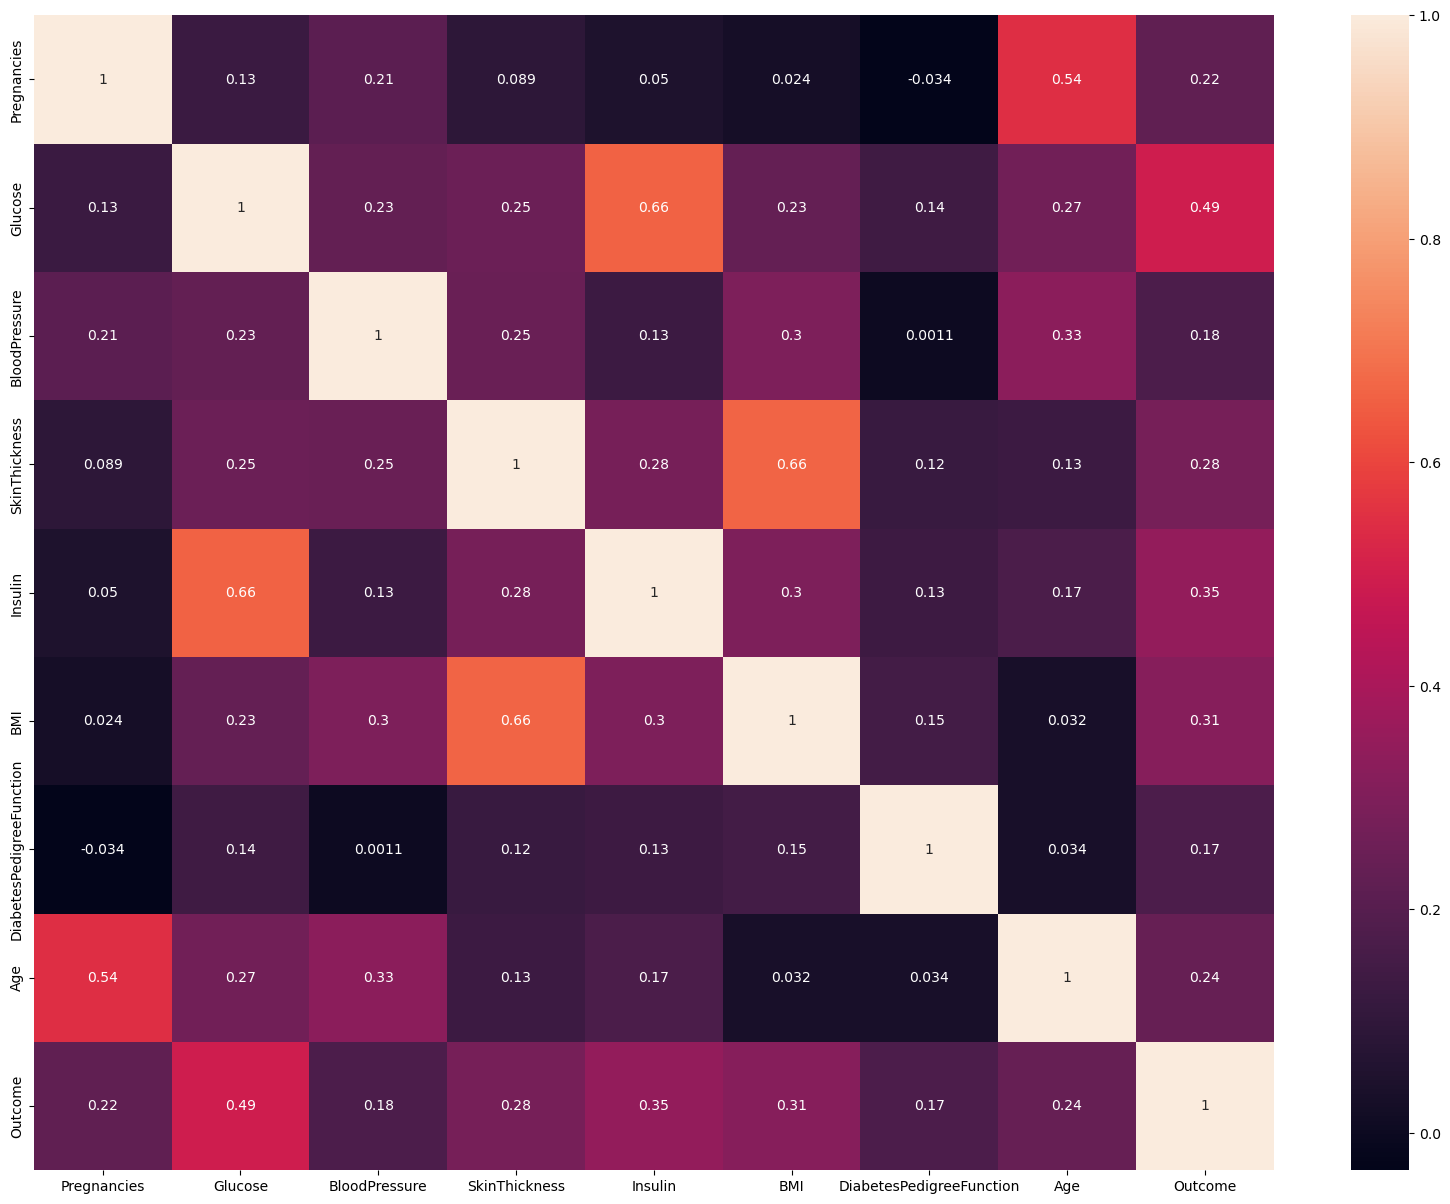

In [189]:
corrmat=df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corrmat, annot=True)
plt.plot()

## Feature Engineering

### Droped features with low correlation

In [242]:
df_selected=df.drop(['BloodPressure','DiabetesPedigreeFunction'],axis='columns')


In [191]:
import numpy as np
# numeric_columns = ['Insulin', 'DiabetesPedigreeFunction']

# for column_name in numeric_columns:
#     Q1 = np.percentile(df[column_name], 25, interpolation='midpoint')
#     Q3 = np.percentile(df[column_name], 75, interpolation='midpoint')

#     IQR = Q3 - Q1
#     low_lim = Q1 - 1.5 * IQR
#     up_lim = Q3 + 1.5 * IQR

#     outliers = df[(df[column_name] < low_lim) | (df[column_name] > up_lim)][column_name]

#     df[column_name] = np.where(df[column_name] < low_lim, low_lim, df[column_name])
#     df[column_name] = np.where(df[column_name] > up_lim, up_lim, df[column_name])

# df = df.drop('BMI',axis=1)



### Handling Outlier
##### Quantile Transformer : Removing outliers can cause data loss so we have to deal with it this method. It transforms the features to follow a uniform or a normal distribution

In [243]:

from sklearn.preprocessing import QuantileTransformer
x=df_selected
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
df_new=quantile.transform(X)
df_new=pd.DataFrame(X)
df_new.columns =['Pregnancies', 'Glucose','SkinThickness','Insulin','BMI','Age','Outcome']
df_new.head()



,Pregnancies,Glucose,SkinThickness,Insulin,BMI,Age,Outcome
0,0.747718,0.810300,0.801825,0.000000,0.591265,0.889831,1.0
1,0.232725,0.097784,0.644720,0.000000,0.227510,0.558670,0.0
2,0.863755,0.956975,0.000000,0.000000,0.091917,0.585398,1.0
3,0.232725,0.131030,0.505867,0.662973,0.298566,0.000000,0.0
4,0.000000,0.721643,0.801825,0.834420,0.926988,0.606258,1.0


In [244]:
df = df_new

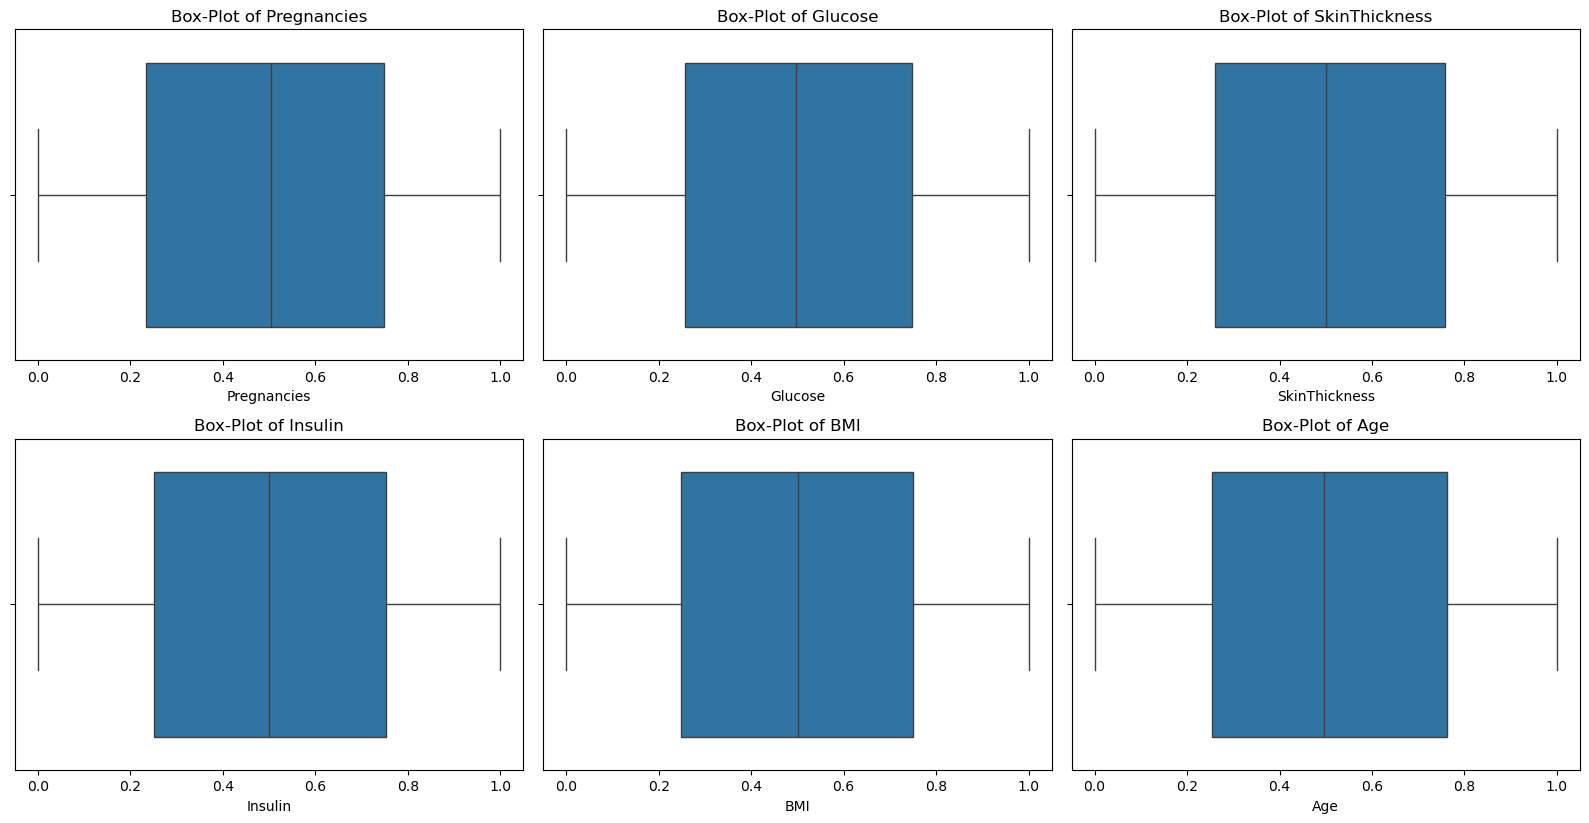

In [194]:
features = df.columns
features = features.drop('Outcome')
plt.figure(figsize=(16, 12))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=feature, data=df)
    plt.title(f'Box-Plot of {feature}', fontsize=12)

plt.tight_layout()
plt.show()


### Split the Data into X and y


In [245]:
x = df.drop('Outcome',axis=1)
y = df['Outcome']

In [246]:
x.head()

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,Age
0,0.747718,0.810300,0.801825,0.000000,0.591265,0.889831
1,0.232725,0.097784,0.644720,0.000000,0.227510,0.558670
2,0.863755,0.956975,0.000000,0.000000,0.091917,0.585398
3,0.232725,0.131030,0.505867,0.662973,0.298566,0.000000
4,0.000000,0.721643,0.801825,0.834420,0.926988,0.606258


In [197]:
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Outcome, dtype: float64

### TRAIN TEST SPLIT


In [247]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2)

## Random Forest Classifier

In [248]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [249]:
rf_pred=model.predict(x_test)

## Model Evaluation

In [250]:
from sklearn.metrics import classification_report,confusion_matrix,f1_score, precision_score, recall_score, accuracy_score

print("Classification Report is:\n",classification_report(y_test,rf_pred))

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.81      0.83      0.82       102
         1.0       0.65      0.62      0.63        52

    accuracy                           0.76       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.76      0.76      0.76       154



## Hyperparameter Tuning (RFC)

In [251]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

model = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
    'class_weight': ['balanced']
}
param_grid = {'bootstrap': [True],
 'class_weight': ['balanced'],
 'max_depth': [10],
 'max_features': ['log2'],
 'min_samples_leaf': [1],
 'min_samples_split': [5],
 'n_estimators': [200]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_rfc = GridSearchCV(model,param_grid, n_jobs=-1,cv= cv, scoring='accuracy')




In [252]:
grid_rfc.fit(x_train,y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'class_weight': ['balanced'],
                         'max_depth': [10], 'max_features': ['log2'],
                         'min_samples_leaf': [1], 'min_samples_split': [5],
                         'n_estimators': [200]},
             scoring='accuracy')

In [253]:
grid_rfc.best_params_

{'bootstrap': True,
 'class_weight': 'balanced',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

In [254]:
rfg_pred = grid_rfc.predict(x_test)

### Model Evaluation

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.84      0.82      0.83       102
         1.0       0.67      0.69      0.68        52

    accuracy                           0.78       154
   macro avg       0.75      0.76      0.76       154
weighted avg       0.78      0.78      0.78       154


 Confusion Matrix:



<Axes: >

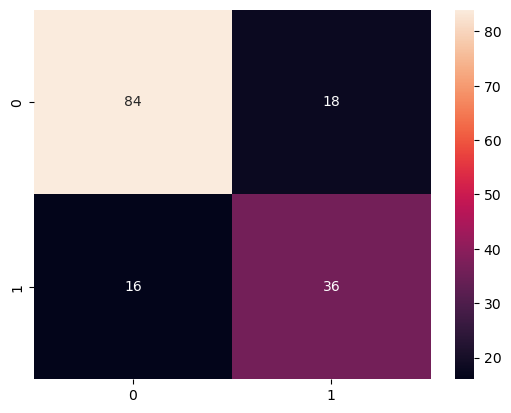

In [255]:

print("Classification Report is:\n",classification_report(y_test,rfg_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,rfg_pred),annot=True)

## ROC-AUC (RFC)

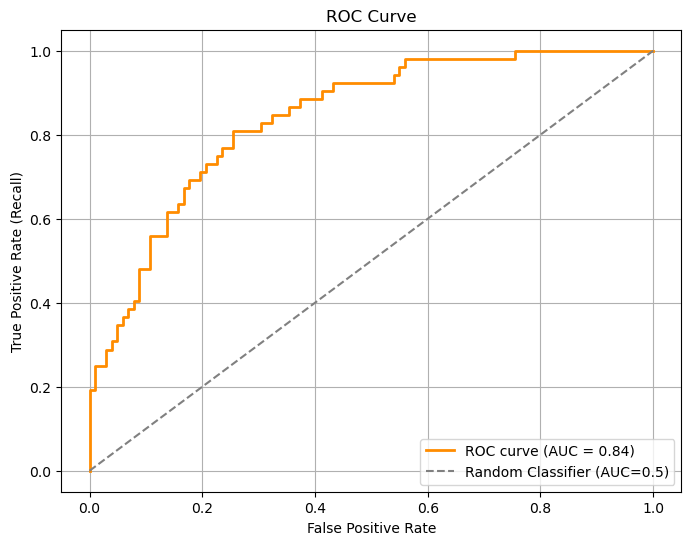

In [256]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay,roc_auc_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

y_probs = grid_rfc.predict_proba(x_test)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier (AUC=0.5)')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [257]:
import numpy as np

j_scores = tpr - fpr
best_index = np.argmax(j_scores)
best_threshold = thresholds[best_index]

print(f"Best Threshold by Youden's J: {best_threshold:.2f}")



Best Threshold by Youden's J: 0.42


## Gradient Boosting Classifier

In [258]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(random_state=42)


In [259]:
gbm.fit(x_train,y_train)

GradientBoostingClassifier(random_state=42)

In [260]:
y_gbm = gbm.predict(x_test)

## Model Evaluation

In [261]:
print("Classification Report is:\n",classification_report(y_test,y_gbm))
print("\n Confusion Matrix:\n")

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.79      0.84      0.82       102
         1.0       0.64      0.56      0.60        52

    accuracy                           0.75       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.74      0.75      0.74       154


 Confusion Matrix:



## Hyper Parameter Tuning (GBM)

In [262]:
param_grid = {
    'n_estimators': [100, 150, 200],           
    'learning_rate': [0.01, 0.05, 0.1],        
    'max_depth': [3, 4, 5],                    
    'min_samples_split': [2, 5, 10],           
    'max_features': ['sqrt', 'log2'],          
}

gbm = GradientBoostingClassifier(random_state=42)

grid_gbm = GridSearchCV(
    estimator=gbm,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',   
    verbose=1,
    n_jobs=-1
)


grid_gbm.fit(x_train, y_train)


Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy', verbose=1)

In [263]:
grid_gbm.best_params_

{'learning_rate': 0.01,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 200}

In [264]:
y_grgbm = grid_gbm.predict(x_test)

## Model Evaluation (Tuned)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.80      0.84      0.82       101
         1.0       0.67      0.60      0.63        53

    accuracy                           0.76       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.76      0.76      0.76       154


 Confusion Matrix:



<Axes: >

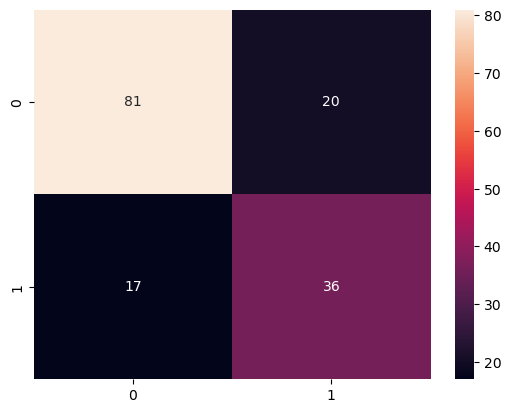

In [216]:
print("Classification Report is:\n",classification_report(y_test,y_grgbm))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,y_gbm),annot=True)

## ROC-AUC(GBM)

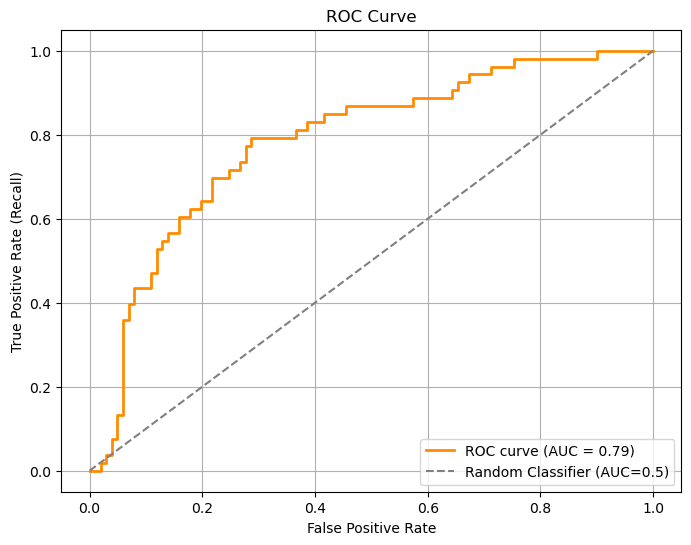

In [217]:
y_probs = grid_gbm.predict_proba(x_test)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier (AUC=0.5)')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [218]:
j_scores = tpr - fpr
best_index = np.argmax(j_scores)
best_threshold = thresholds[best_index]

print(f"Best Threshold by Youden's J: {best_threshold:.2f}")

Best Threshold by Youden's J: 0.37


## XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [269]:
y_xgb = xgb.predict(x_test)


In [270]:
print("Classification Report is:\n",classification_report(y_test,y_xgb))
print("\n Confusion Matrix:\n")

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.81      0.78      0.80       102
         1.0       0.60      0.63      0.62        52

    accuracy                           0.73       154
   macro avg       0.70      0.71      0.71       154
weighted avg       0.74      0.73      0.74       154


 Confusion Matrix:



## Hyperparameter tuning

In [222]:
param_grid = {
    'n_estimators': [100, 200, 300],           
    'learning_rate': [0.01, 0.05, 0.1],        
    'max_depth': [3, 4, 5],                    
    'min_child_weight': [1, 3, 5],             
    'gamma': [0, 0.1, 0.3],                    
    'subsample': [0.8, 1.0],                   
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

grid_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='roc_auc',     # or 'accuracy', 'f1', etc.
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_xgb.fit(x_train, y_train)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


/home/aswin/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:48:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aswin/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:48:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aswin/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:48:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aswin/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:48:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aswin/anaconda3/lib/python3.12/site-packages/xgboo

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0, 0.1, 0.3],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='roc_auc', verbose=1)

In [223]:
y_gs = grid_xgb.predict(x_test)

In [224]:
grid_xgb.best_params_

{'gamma': 0.3,
 'learning_rate': 0.01,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 300,
 'subsample': 0.8}

# Model EValuation(XGB)

Classification Report is:                precision    recall  f1-score   support

         0.0       0.83      0.80      0.81       101
         1.0       0.64      0.68      0.66        53

    accuracy                           0.76       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154


 Confusion Matrix:


<Axes: >

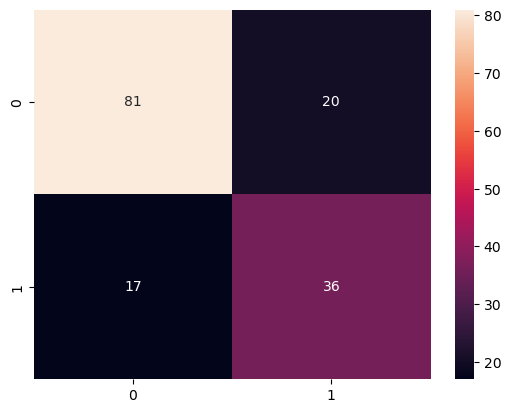

In [225]:
print("Classification Report is: ",classification_report(y_test,y_gs))
print("\n Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test,y_gs),annot=True)

## ROC-AUC (XGB)

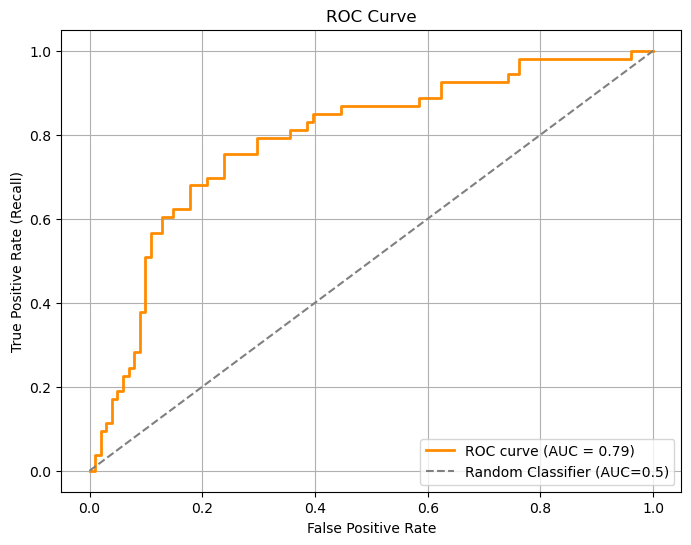

In [226]:
y_probs = grid_xgb.predict_proba(x_test)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier (AUC=0.5)')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [227]:
j_scores = tpr - fpr
best_index = np.argmax(j_scores)
best_threshold = thresholds[best_index]

print(f"Best Threshold by Youden's J: {best_threshold:.2f}")

Best Threshold by Youden's J: 0.43


# Model Comparison

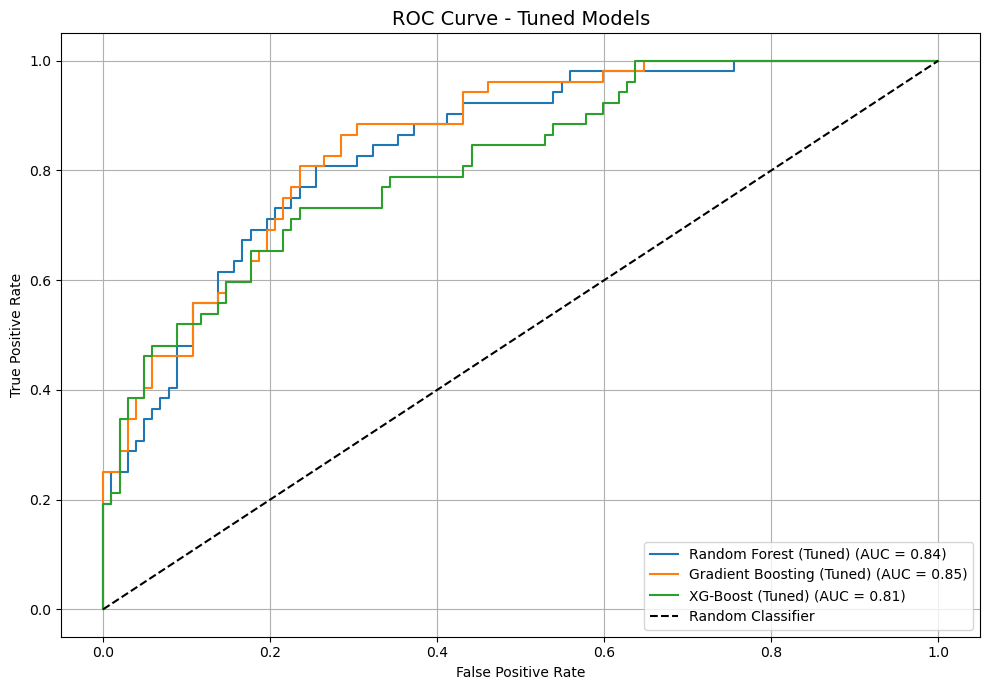

In [271]:
from sklearn.metrics import roc_curve, roc_auc_score
models = {
    "Random Forest (Tuned)": grid_rfc.best_estimator_,
    "Gradient Boosting (Tuned)": grid_gbm.best_estimator_,
    "XG-Boost (Tuned)": grid_xgb.best_estimator_,

}

plt.figure(figsize=(10, 7))

for name, model in models.items():
    y_probs = model.predict_proba(x_test)[:, 1]  
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc_score = roc_auc_score(y_test, y_probs)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.title("ROC Curve - Tuned Models", fontsize=14)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

